## Définition

La régression linéaire est le modèle le plus simple pour modéliser et prédire des valeurs continues en fonction d'autres variables.

Pensez-y comme une ligne droite qui relie les points dans un nuage de données, captant ainsi la tendance générale des observations.

De façon plus rigoureuse, lorsque l'on prédit une variable cible  y à partir d'une variable de prédictionx, la régression linéaire consiste à trouver les coefficients a et b dans l'équation de la droite qui va être la plus proche de tous les points du nuage de points :

     y = ax + b

Dans le cas de 2 variables de prédiction x1 et x2 de y,le modèle correspond à l'équation du plan défini par :

     y= a1x1 + a2x2 + b

De façon générale, si on a N variables x1,...,xN de prédictions dans notre jeu de données pour la prédiction d'une variable cible  y, le modèle de regression linéaire consiste à trouver les N coefficients  a1,...,aN de l'équation :

     y = a_1x_1 + a_2x_2 + ... + a_Nx_N + b

Dans ces exemples, le dernier terme b qui n'est pas associé à une variable prédictive est appelé l'interception. On considère que c'est un coefficient sans signification particulière et on l'ignore.

De façon abrégée nous écrirons :

     y ~ x1 + x2 + .. + xN

Notez le signe  ~  qui veut dire que l'on régresse la variable cible y par rapport aux variables de prédictions    x1,...,xN
   .

La régression linéaire est utilisée dans de nombreux domaines, comme la médecine ou l'économie, et chacun de ces domaines utilise un vocabulaire différent pour désigner :

    - la “variable cible” = variable “dépendante” ou “endogène”. C'est la variable à prédire ;
    - les “variables de prédiction” = variables “d'entrée”, “indépendantes” ou encore “exogènes”. 


La simplicité de la régression linéaire lui confère des propriétés précieuses :

    - interprétabilité : le poids respectif des coefficients correspond au poids relatif des prédicteurs ;
    - facilité d'implémentation : il existe beaucoup de langages et de librairies ;
    - rapidité de calcul : optimisés depuis longtemps, les calculs sont hyper rapides ;
    - légère en mémoire : donc adaptée à l'Internet des Objets (IoT) basé sur des senseurs de faible puissance.  

## Les limites de la régression linéaire

Utiliser une régression linéaire nécessite cependant de prendre quelques précautions.

#### Limite n° 1 : Utiliser une régression linéaire à partir d’un cas non linéaire ne marchera pas

Il faut s'assurer que la relation entre la variable cible et les prédicteurs soit linéaire. Utiliser une régression linéaire dans des cas évidemment non linéaires ne marchera pas.

Mais qu'est-ce qu'un cas non linéaire ?

Supposons que nous ayons une relation quadratique entre la variable cible et un prédicteur
y = a ∗x 2 + du bruit comme sur le graphe ci-dessous. On voit bien que la droite de la régression linéaire n'explique en rien la relation entre le prédicteur et la cible.


#### Limite n° 2 : des variations d'amplitude significative peuvent fausser l'importance des coefficients

Une autre précaution utile concerne l'amplitude respective des variables.

Les valeurs des coefficients de la régression linéaire sont en effet inversement proportionnelles à l'amplitude de la variable associée.

Si une variable est 1 000 fois plus grande en moyenne qu'une autre variable, et si ces 2 variables ont le même pouvoir de prédiction sur la variable cible, alors le coefficient de la grande variable sera 1 000 fois plus petit que celui de la deuxième variable.

En normalisant les variables afin que leur amplitude soit comprise dans un intervalle comparable, chaque coefficient de la régression linéaire reflète directement l'impact de la variable sur la variable cible, son pouvoir de prédiction.

# Exemples sur un jeu de données

C'est un dataset classique issu du livre référence An introduction to Statistical Learning. Il contient 200 échantillons sur le budget alloué aux publicités télévisées, à la radio et dans les journaux, ainsi que les ventes résultantes.

    Variable cible :  ventes  (  sales  dans la version originale).est continue, donc nous sommes bien dans une logique de régression (et non de classification)

    Prédicteurs : budgets de publicité         
        pour la TV :  tv  ;
        pour la la radio :  radio  ;
        pour la presse :  journaux  (  newspaper  dans la version originale).

Nous allons essayer de prédire le volume de vente en fonction du budget publicitaire en TV, radio et journaux.

Chargeons et explorons le dataset.

In [3]:
import pandas as pd
import matplotlib.pyplot as mlp
import seaborn as sns 


#Ouverture du jeu de données
df = pd.read_csv("advertising.csv")

In [4]:
df

,tv,radio,journaux,ventes
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:


df.describe()

,tv,radio,journaux,ventes
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.head()

,tv,radio,journaux,ventes
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Avant d'entraîner le modèle, il convient de regarder les relations entre les différentes variables. Pour cela nous utilisons Seaborn et Matplotlib, librairies de visualisation en Python.

La fonction  **regplot()**  permet non seulement d'afficher le nuage de points des variables  tv  ,  radio  et  journaux  en fonction des ventes, mais aussi de tracer la ligne de régression.

<Axes: xlabel='tv', ylabel='ventes'>

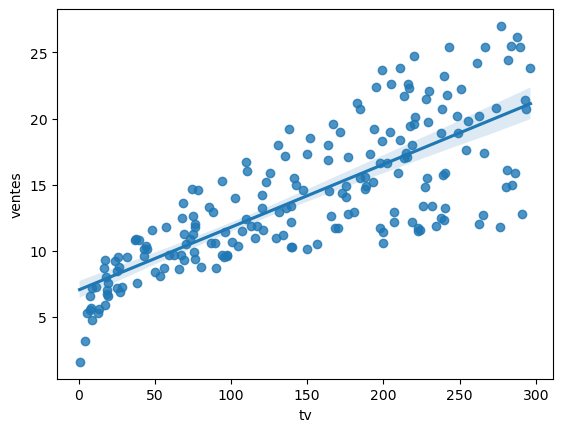

In [7]:
sns.regplot(df, x="tv", y="ventes")

<Axes: xlabel='radio', ylabel='ventes'>

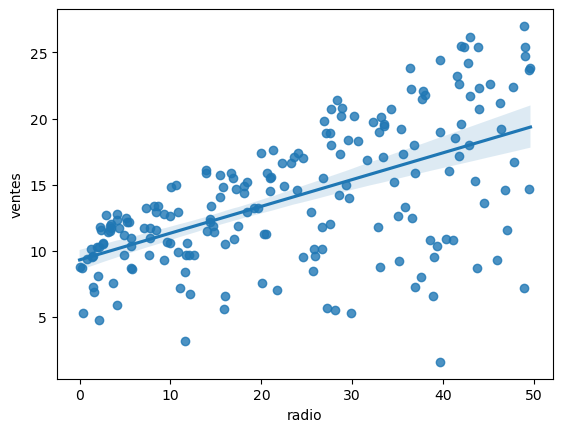

In [8]:
sns.regplot(df, x="radio", y="ventes")

<Axes: xlabel='journaux', ylabel='ventes'>

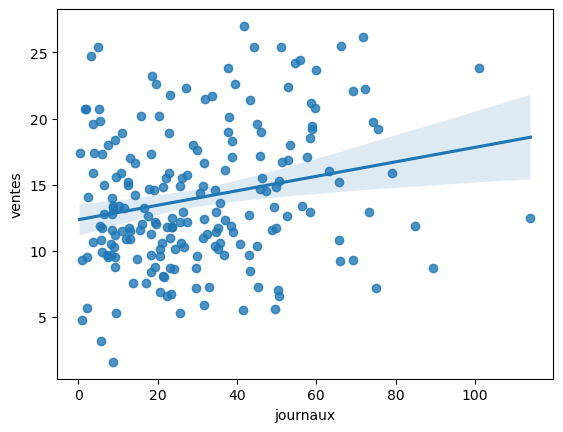

In [9]:
sns.regplot(df, x="journaux", y="ventes")

La zone bleu pâle reflète l'incertitude du modèle. Plus elle est grande, moins la régression est fiable

Le graphe montre que :

    tv  est plus prédictive des ventes que  radio 
    radio  est plus prédictive que  journaux 

L'observation est confirmée par les coefficients de corrélation :

In [10]:

#Matrice des corréaltions


df.corr()


,tv,radio,journaux,ventes
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
journaux,0.056648,0.354104,1.000000,0.228299
ventes,0.782224,0.576223,0.228299,1.000000


#### Appplication du modèle



On choisi la méthode de regression linéaire 


Cette fois-ci, on va scinder notre dataset en une partie d'entraînement et une partie d'évaluation en utilisant la fonction train_test_split de scikit-learn.

Cette fonction prends les variables d'entrée, la variable cible, un ratio et retourne 4 objets :
   
    X_train  : prédicteurs pour l'entraînement ;
    X_test  : prédicteurs pour l'évaluation ;
    y_train  : variable cible pour l'entraînement ;
    y_test  : variable pour l'évaluation.

On va ensuite utiliser :

    X_train  et  y_train  pour entraîner le modèle (train en anglais) ;
    X_test  et  y_test  pour l'évaluer (test en anglais).

Cela donne :

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [12]:
from sklearn.model_selection import train_test_split
X = df[['tv','radio','journaux']]
y = df.ventes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##### Données d'entrainement

Il représente 80% de nos données totales

In [13]:
X_train

,tv,radio,journaux
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [14]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: ventes, Length: 160, dtype: float64

##### Données de test

Il représente 20% de nos données totales

In [15]:
X_test

,tv,radio,journaux
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [16]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: ventes, dtype: float64

On a donc 160 échantillons pour entraîner notre modèle et 40 échantillons que le modèle ne voit pas pendant son entraînement et qui nous serviront à l'évaluer.

Le terme random_state est un paramètre qui permet de contrôler la reproductibilité des résultats lorsque vous effectuez des opérations qui impliquent de l'aléatoire, comme par exemple scinder les données en sous-ensembles de train et test.

En fixant une valeur spécifique pour random_state, vous vous assurez que les opérations aléatoires se déroulent toujours de la même manière. Les résultats sont reproductibles et vous pouvez comparer différents modèles.

In [17]:
reg.fit(X_train, y_train)

LinearRegression()

Pour estimer la performance sur le sous-ensemble de test, il faut tout d'abord obtenir les prédictions pour  **X_test**  :

In [18]:
y_pred_test = reg.predict(X_test)

y_pred_test

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

On peut maintenant calculer l'écart entre les vraies valeurs de test  (y_test)  et celles prédites par le modèle.

Utilisons la RMSE et la MAPE comme scores. Pour ces 2 métriques, un score plus petit correspond à un meilleur modèle. MAPE est comprise entre 0 et 1, tandis que RMSE n'est pas contrainte.

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

print(f"RMSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")

RMSE: 3.1740973539761046
MAPE: 0.15198846602831229


Comme la RMSE n'est pas absolue. Une MAPE de 0,15 semble bien, car plus proche de 0 que de 1.

#### Amélioration : Ajouter un terme quadratique

Si l'on regarde bien le nuage de points de  **ventes**  par rapport à  **tv**  , on remarque que ce nuage de points suit plutôt une courbe qu'une ligne droite. C'est particulièrement vrai pour la partie en bas à gauche du graphe.

On peut en déduire que la relation entre  ventes  et  tv  n'est pas simplement linéaire, c'est-à-dire :

    ventes = a∗tv + b

Mais cela dépend aussi d'un terme **tv²** comme ceci :

     ventes = a∗tv + b∗tv² + c

C'est un polynôme du second degré de variable  **tv**  

Lorsqu'on ajoute une puissance de l'une des variables dans la régression, on fait ce qu'on appelle une régression polynomiale.

##### Régression polynomiale

La régression polynomiale consiste à ajouter les puissances de certains prédicteurs dans la régression. C'est une façon simple pour capturer les relations non linéaires entre les variables.

Avant d'entraîner ce nouveau modèle, on remarque que l'amplitude de  tv2  va être bien plus grande que celle des autres variables. On va donc normaliser les variables, pour que leurs amplitudes soient compatibles.

Créons la nouvelle variable tv2 = tv² :

In [20]:
#Ajout d'une nouvelle variables

df["tv2"] = df.tv**2

Normalisons l'amplitude en utilisant **MinMaxScaler** qui force les variables entre 0 et 1.

Dans sklearn, appliquer un "Scaler" consiste à :

In [25]:
#Importer
from sklearn.preprocessing import MinMaxScaler


#Créer ou instancier
scaler = MinMaxScaler()

#Fit() sur les données - calcul les min et max des variables
scaler.fit_transform(df)

#Transformation des données
data_array = scaler.transform(df)


df = pd.DataFrame(data_array, columns = ['tv','radio','journaux','ventes','tv2'])

In [26]:
df

,tv,radio,journaux,ventes,tv2
0,0.775786,0.762097,0.605981,0.807087,0.602664
1,0.148123,0.792339,0.394019,0.346457,0.022535
2,0.055800,0.925403,0.606860,0.303150,0.003362
3,0.509976,0.832661,0.511873,0.665354,0.261253
4,0.609063,0.217742,0.510994,0.444882,0.372080
...,...,...,...,...,...
195,0.126818,0.074597,0.118734,0.236220,0.016605
196,0.316199,0.098790,0.068602,0.318898,0.101001
197,0.596212,0.187500,0.053650,0.440945,0.356604
198,0.956713,0.846774,0.579595,0.940945,0.915495


In [27]:
df.describe().loc[['min','max']]

,tv,radio,journaux,ventes,tv2
min,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0


Notre régression linéaire est maintenant une régression polynomiale grâce à la présence du terme quadratique  tv2  . Entraînons-la.

    y ~ tv + radio + journaux + tv²

In [28]:
X = df[['tv','radio','journaux', 'tv2']]
y = df.ventes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

reg.fit(X_train, y_train)
y_hat_test = reg.predict(X_test)

print(f"Coefficients: {reg.coef_}")
print(f"RMSE: {mean_squared_error(y_test, y_hat_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_hat_test)}")

Coefficients: [ 0.88007136  0.37464292  0.02197664 -0.36578279]
RMSE: 0.0036863988616064646
MAPE: 0.1620018279993568


On note une nette amélioration par rapport au premier modèle.

Il est possible d'aller encore plus loin en ajoutant le terme croisé  tv * radio  qui reflète l'effet cumulé d'une campagne de pub qui soit à la fois à la radio et à la télévision.

On a parlé du paramètre random_state qui permet de contrôler l'aspect aléatoire du "train, test, split". En faisant varier ce paramètre, les données seront réparties parmi les sous-ensembles entraînement et test de façon différente et le modèle ne sera pas entraîné sur les mêmes échantillons.

Cependant imaginez que parmi le jeu de données se trouvent quelques échantillons très différents des autres. Par exemple, un très fort budget en journaux (> 200, par exemple). Si ces échantillons se retrouvent dans le sous-ensemble d'entraînement, le modèle va le prendre en compte et la droite de régression sera plus plate ou penchée que si ces échantillons se trouvaient dans le sous-ensemble de **test**.

Pour observer  cette sensibilité à la répartition entre train et test, ainsi que l'influence du random_state, comparez les scores obtenus au  **test_size**  et au  **random_state**  . Pour un **test_size** élevé (  **test_size** = 0.800  , le modèle aura très peu d'échantillons pour s'entraîner et sera plus sensible à la répartition des échantillons entre le test et le train.

C'est bien ce que l'on observe sur la figure suivante où l'on voit le score obtenu sur la régression  **ventes ~ tv + radio + journaux**  pour des valeurs décroissantes de **test_size** : 80 %, 60 %, 40 % et 20 %.

La variabilité du score est plus importante quand le nombre d'échantillons d'entraînement est faible (à gauche,  test_size  = 80 %).

Néanmoins, même pour un large set d'échantillons d'entraînement (à droite,  test_size  = 20 %), les scores peuvent varier fortement en fonction de la valeur de  random_state  . 